# Data Scientist Assessment Test - ABC Company

*Johan Sebastian Muñoz Moyano*

*jo-ha27@hotmail.com*

**In the next .ipynb file, you are going to find the analysis of historical data and forecast of sales and human resources need for March of 2021**

In [1]:
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install seaborn

  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached Pillow-9.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.0.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached scipy-1.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import base64
import sklearn
import seaborn as sns

In [138]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

## Import data

In [4]:
#import the mainly file
df = pd.read_csv('Data/Datos_Prueba_DataScientist.csv')
df.head()

,OrderId,RequestTime,DeliveryOption
0,PED_1,2018-01-01 08:03:12,Mismo dia entre 6:30 pm y 8:30 pm
1,PED_2,2018-01-01 08:28:55,Mismo dia entre 6:30 pm y 8:30 pm
2,PED_3,2018-01-01 08:39:08,Mismo dia entre 6:30 pm y 8:30 pm
3,PED_4,2018-01-01 09:25:07,Siguiente dia entre 12:30 pm y 2:30 pm
4,PED_5,2018-01-01 09:36:25,Siguiente dia entre 12:30 pm y 2:30 pm


## Review of data

In [7]:
df.DeliveryOption.unique()

array(['Mismo dia entre 6:30 pm y 8:30 pm',
       'Siguiente dia entre 12:30 pm y 2:30 pm',
       'Siguiente dia entre las 6:30 pm y 8:30 pm'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153275 entries, 0 to 153274
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   OrderId         153275 non-null  object
 1   RequestTime     153275 non-null  object
 2   DeliveryOption  153275 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


In [9]:
df.RequestTime=pd.to_datetime(df.RequestTime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153275 entries, 0 to 153274
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrderId         153275 non-null  object        
 1   RequestTime     153275 non-null  datetime64[ns]
 2   DeliveryOption  153275 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.5+ MB


In [10]:
df=df.copy()
#Define a format of hour in the new column
df['Hour']=pd.to_datetime(df['RequestTime'],errors='raise',format='%H:%M')

#Turn into only format hours the new column
df['Hour'] = df['Hour'].dt.hour
df.head()

,OrderId,RequestTime,DeliveryOption,Hour
0,PED_1,2018-01-01 08:03:12,Mismo dia entre 6:30 pm y 8:30 pm,8
1,PED_2,2018-01-01 08:28:55,Mismo dia entre 6:30 pm y 8:30 pm,8
2,PED_3,2018-01-01 08:39:08,Mismo dia entre 6:30 pm y 8:30 pm,8
3,PED_4,2018-01-01 09:25:07,Siguiente dia entre 12:30 pm y 2:30 pm,9
4,PED_5,2018-01-01 09:36:25,Siguiente dia entre 12:30 pm y 2:30 pm,9


In [11]:
#Do the same excercise with the days, just with the finally of watch the behavior of the historical data od orders
#and deliveries

df['Date'] = df['RequestTime'].dt.date

#I decided use group by days, to get initial information
df.head()

,OrderId,RequestTime,DeliveryOption,Hour,Date
0,PED_1,2018-01-01 08:03:12,Mismo dia entre 6:30 pm y 8:30 pm,8,2018-01-01
1,PED_2,2018-01-01 08:28:55,Mismo dia entre 6:30 pm y 8:30 pm,8,2018-01-01
2,PED_3,2018-01-01 08:39:08,Mismo dia entre 6:30 pm y 8:30 pm,8,2018-01-01
3,PED_4,2018-01-01 09:25:07,Siguiente dia entre 12:30 pm y 2:30 pm,9,2018-01-01
4,PED_5,2018-01-01 09:36:25,Siguiente dia entre 12:30 pm y 2:30 pm,9,2018-01-01


In [12]:
#Define the format of the dates
df['month']=pd.to_datetime(df['RequestTime'],errors='raise',format='%Y/%m/%d')
#group the dates by month
df['month']=df['month'].dt.to_period('M')
    
df.head()

,OrderId,RequestTime,DeliveryOption,Hour,Date,month
0,PED_1,2018-01-01 08:03:12,Mismo dia entre 6:30 pm y 8:30 pm,8,2018-01-01,2018-01
1,PED_2,2018-01-01 08:28:55,Mismo dia entre 6:30 pm y 8:30 pm,8,2018-01-01,2018-01
2,PED_3,2018-01-01 08:39:08,Mismo dia entre 6:30 pm y 8:30 pm,8,2018-01-01,2018-01
3,PED_4,2018-01-01 09:25:07,Siguiente dia entre 12:30 pm y 2:30 pm,9,2018-01-01,2018-01
4,PED_5,2018-01-01 09:36:25,Siguiente dia entre 12:30 pm y 2:30 pm,9,2018-01-01,2018-01


In [13]:
monthly_Request=df.groupby('month',sort=True).size()

monthly_Request=pd.DataFrame(monthly_Request)
monthly_Request=monthly_Request.reset_index()

monthly_Request['deliveries'] = monthly_Request[0]
del monthly_Request[0]

# monthly_Request.index()
# monthly_Request.columns('month','deliveries')
monthly_Request.head()

,month,deliveries
0,2018-01,826
1,2018-02,733
2,2018-03,979
3,2018-04,1121
4,2018-05,1324


## A first review of the historial data about deliviers

**For this particular case, the deliveries are equivalent to orders and sells**

Text(0, 0.5, 'Deliveries/Orders/Sells')

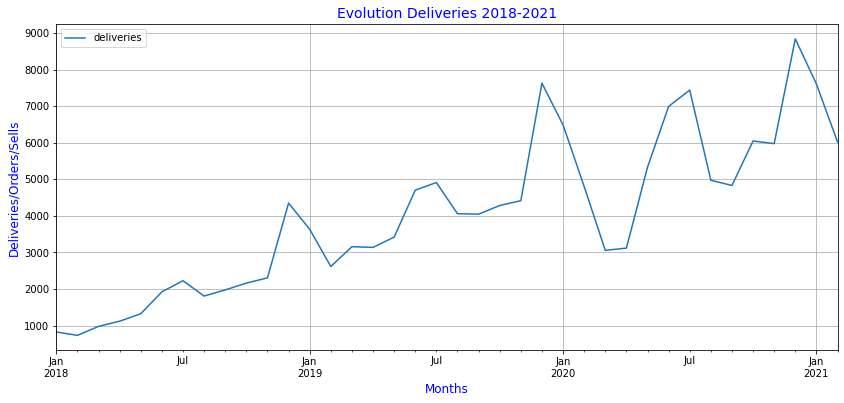

In [34]:
#This is a initial review of the historical trend.

monthly_Request[['month','deliveries']].set_index('month').plot(figsize=(14,6))
plt.title('Evolution Deliveries 2018-2021',fontsize=14, color='Blue')
plt.grid(True)
plt.xlabel('Months', fontsize=12, color='Blue')
plt.ylabel('Deliveries/Orders/Sells', fontsize=12, color='Blue')




Its clear that the orders have an increment in the last four years with a fluctuation in the beginning of 2020 because the pandemic, mainly between February and March.

## Conversion of the values into the column DeliveryOption and data grouped by month


In [15]:
#Identify and turn the data to separate and organize in the future

df=df.copy()

# Turn into a number the values of DeliveryOption
df["DeliveryOption"].replace({"Mismo dia entre 6:30 pm y 8:30 pm": "1", 
                              "Siguiente dia entre 12:30 pm y 2:30 pm": "2",
                              'Siguiente dia entre las 6:30 pm y 8:30 pm':'3'},
                             inplace=True)

#group by month and kind of delivery
del_month  = df.groupby(['month','DeliveryOption']).size()

#Create a data frame with the new information to a better visual content and for treatment with plots and correlations
del_month=del_month.to_frame().reset_index()
del_month.rename(columns={0:'Orders_Total'},inplace=True)

#Turn the Object values into a more convenient kind
del_month["DeliveryOption"] = del_month["DeliveryOption"].astype(str).astype(int)
del_month.head()

,month,DeliveryOption,Orders_Total
0,2018-01,1,376
1,2018-01,2,254
2,2018-01,3,196
3,2018-02,1,363
4,2018-02,2,219


## Separation of values between kinds of delivery and identifying correlations

### **Note: We are going to consider a delivery as a sale, order or request, because if one of this didn't exist, the delivery don´t exist**

**I separate the ''Options of delivery'' to see the behavior of each one.**

In [64]:
df['option1'] = df['DeliveryOption']=='1'

df["option1"].replace({True: 1, False: 0,},inplace=True)

Option_1=pd.DataFrame()

Option_1['OrderId'] = df['OrderId']
Option_1['year_month'] = df['month']
Option_1['option1'] = df['option1']

Option_1 = Option_1.set_index("option1")
Option_1=Option_1.drop(0)
Option_1=Option_1.reset_index()

Option_1_group=Option_1.groupby(['year_month']).size()
Option_1_group.head()

Option_1_group=Option_1_group.to_frame().reset_index()
Option_1_group.rename(columns={0:'Delivery_Opt_1'},inplace=True)
# Option_1_group.columns('month','Orders_Opt_1')
Option_1_group.head()

,year_month,Delivery_Opt_1
0,2018-01,376
1,2018-02,363
2,2018-03,500
3,2018-04,591
4,2018-05,701


<AxesSubplot:xlabel='Monthly Period', ylabel='Delivery_Opt_1'>

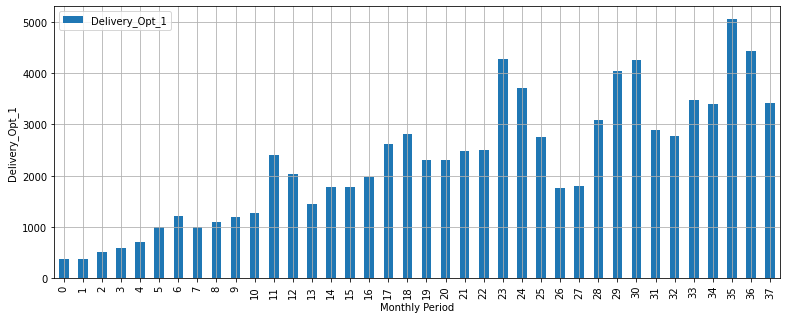

In [65]:
#A simple bar graph to see the distributions of data throught time. 
Option_1_group.plot(kind='bar', figsize=(13,5), stacked=True, grid='both',xlabel='Monthly Period',ylabel='Delivery_Opt_1')

*The objective is know the distribution of the data, to choose a method to identify the linear correlation and after create the linear regression for the forecast of March.*

**We can see, thas is not a normal distribution, so I'm not going to use the method of Pearson. I did the same excercise for the other options of the delivery and for the levels of affectedness, to confirm what method use. In the next cells, we are going to see the behavior of the values and the correlations**

________________________________________________________________________________________________________________

*To continue, is necesary import from other file the behavior of affectedness because Covid-19 for the next month*

In [72]:
#import file with the data of the levels of affectedness by covid
Aff = pd.read_csv('Data/Affectedness.csv', sep=';')

<AxesSubplot:xlabel='Monthly Period', ylabel='Affectedness'>

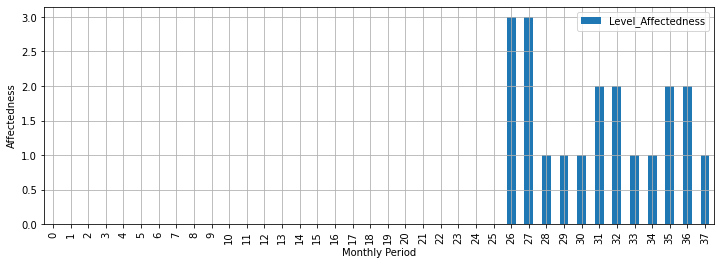

In [67]:
Aff.plot(kind='bar', figsize=(12,4), stacked=True,grid='both',xlabel='Monthly Period',ylabel='Affectedness')

*As we hoped, is impossible get a normal distribution of the level of affetedness*

___________________________________________________________________________________________________________

I continue identifiying the correlation between the deliveries and the level of affectedness **(remember a delivery is a sale)**.

I discart the method of Pearson because is neccessary have data, with a normal distribution

In [119]:
# Insert the new data in the table of option1
Option_1_group['Level_Affectedness']=Aff['Level_Affectedness']

**I use two methods to identify the correlation between delivery and Level_Affectdness, Spearman and Kendall**

In [121]:
Option_1_group.corr(method ='spearman')

,Delivery_Opt_1,Level_Affectedness
Delivery_Opt_1,1.000000,0.536764
Level_Affectedness,0.536764,1.000000


In [122]:
Option_1_group.corr(method ='kendall')

,Delivery_Opt_1,Level_Affectedness
Delivery_Opt_1,1.000000,0.419775
Level_Affectedness,0.419775,1.000000


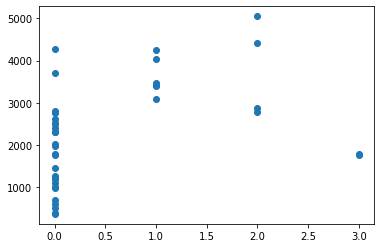

In [130]:
pyplot.scatter(Option_1_group['Level_Affectedness'], Option_1_group['Delivery_Opt_1'])
pyplot.show()

We can identify a positive correlation between the variables, and is could  be strange because, if we whatch the first graph, we can observ a fall down in March of 2020, when the world were beign confinated.

We can see a huge data with the value of zero that is affecting the correlation, further this data is in a period when the world didn't expect a pandemic, so I decided let out the values before of the year 2020, to find a correct correlation and create a forecast to March of 2021.

In [76]:
#let out the data before th pandemic
Option_1_no_2019 = Option_1_group.iloc[24:,]

Option_1_no_2019.reset_index()
Option_1_no_2019.corr(method ='spearman')

,Delivery_Opt_1,Level_Affectedness
Delivery_Opt_1,1.000000,-0.269229
Level_Affectedness,-0.269229,1.000000


In [77]:
Option_1_no_2019.corr(method ='kendall')

,Delivery_Opt_1,Level_Affectedness
Delivery_Opt_1,1.000000,-0.203397
Level_Affectedness,-0.203397,1.000000


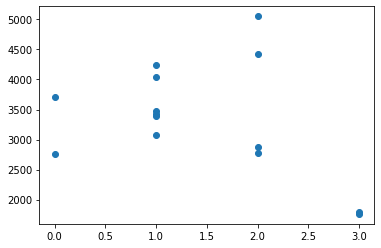

In [137]:
pyplot.scatter(Option_1_no_2019['Level_Affectedness'], Option_1_no_2019['Delivery_Opt_1'])

**Now, I get a negative correlation so we can with both methods, this have more logic so, just I need chosse a method.**

**Based the desicion of the conditions and characteristics of both methods, and we use a little the logics, I chosse the Kendall Method, because:**
1. The data don't have a normal distribution.
2. The data for the case of the level of affectedness is litte.
3. Using the logic, the level of sales (and deliveries), would be affected by the pandemic, but is an essential product (food), so I think that the negative correlation in this case is weak.

### Now is necessary do the same for the others delivery options

**We now that we just need the data between 2020 and 2021**

<AxesSubplot:xlabel='Monthly Period', ylabel='Delivery_Opt_2'>

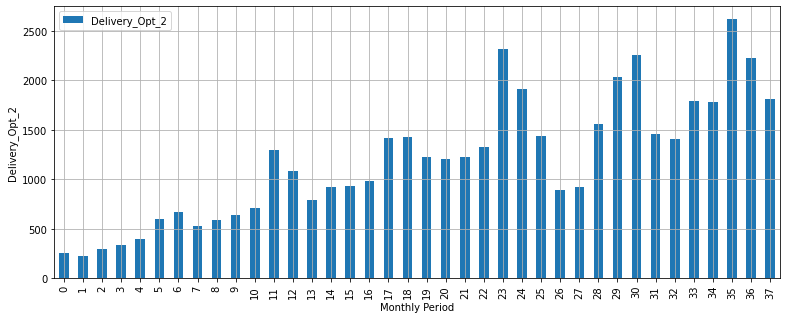

In [86]:
df['option2'] = df['DeliveryOption']=='2'

df["option2"].replace({True: 1, False: 0,},inplace=True)

Option_2=pd.DataFrame()

Option_2['OrderId'] = df['OrderId']
Option_2['year_month'] = df['month']
Option_2['option2'] = df['option2']

Option_2 = Option_2.set_index("option2")
Option_2=Option_2.drop(0)
Option_2=Option_2.reset_index()

Option_2_group=Option_2.groupby(['year_month']).size()
Option_2_group.head()

Option_2_group=Option_2_group.to_frame().reset_index()
Option_2_group.rename(columns={0:'Delivery_Opt_2'},inplace=True)
# Option_1_group.columns('month','Orders_Opt_1')
Option_2_group.head()

#A simple bar graph to see the distributions of data throught time. 
Option_2_group.plot(kind='bar', figsize=(13,5), stacked=True, grid='both',xlabel='Monthly Period',ylabel='Delivery_Opt_2')

In [112]:
# Insert the new data in the table of option1
Option_2_group['Level_Affectedness']=Aff['Level_Affectedness']
#let out the data before th pandemic
Option_2_no_2019 = Option_2_group.iloc[24:,]

Option_2_no_2019.reset_index()
Option_2_no_2019.corr(method ='kendall')
# Option_2_no_2019

,Delivery_Opt_2,Level_Affectedness
Delivery_Opt_2,1.000000,-0.254246
Level_Affectedness,-0.254246,1.000000


<AxesSubplot:xlabel='Monthly Period', ylabel='Delivery_Opt_3'>

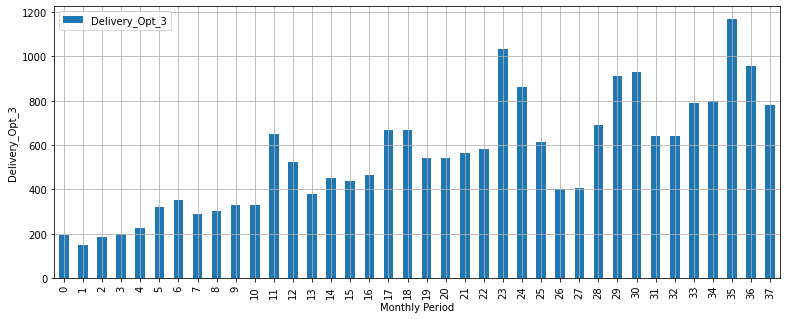

In [101]:
df['option3'] = df['DeliveryOption']=='3'

df["option3"].replace({True: 1, False: 0,},inplace=True)

Option_3=pd.DataFrame()

Option_3['OrderId'] = df['OrderId']
Option_3['year_month'] = df['month']
Option_3['option3'] = df['option3']

Option_3 = Option_3.set_index("option3")
Option_3=Option_3.drop(0)
Option_3=Option_3.reset_index()

Option_3_group=Option_3.groupby(['year_month']).size()
Option_3_group.head()

Option_3_group=Option_3_group.to_frame().reset_index()
Option_3_group.rename(columns={0:'Delivery_Opt_3'},inplace=True)

Option_3_group.head()

#A simple bar graph to see the distributions of data throught time. 
Option_3_group.plot(kind='bar', figsize=(13,5), stacked=True, grid='both',xlabel='Monthly Period',ylabel='Delivery_Opt_3')

In [113]:
# Insert the new data in the table of option1
Option_3_group['Level_Affectedness']=Aff['Level_Affectedness']
#let out the data before the pandemic
Option_3_no_2019 = Option_3_group.iloc[24:,]

Option_3_no_2019.reset_index()
Option_3_no_2019.corr(method ='kendall')
# Option_3_no_2019

,Delivery_Opt_3,Level_Affectedness
Delivery_Opt_3,1.000000,-0.203397
Level_Affectedness,-0.203397,1.000000


**We found that the correlation is low even using the Spearman method, in the three kinds of delivery.**

*Even so I used the linear regression to make the forecast for March of 2021 for each delivery option*

In [247]:
#Start with the training of the model using the method fit

#reshape the values of the columns of interest to use the method fit()
nDelivery1=Option_1_no_2019['Delivery_Opt_1'].values.reshape(-1,1)

Affectedness=Option_1_no_2019['Level_Affectedness'].values.reshape(-1,1)

#creation of a instance for the LinearRegression function
linear_regressor = LinearRegression()
#Tell to the fit function the values to learn
linear_regressor.fit(Affectedness,nDelivery1)

#We can see the parameters estimates by the fit method
print(str(linear_regressor.coef_)+str(linear_regressor.intercept_))

[[-375.975]][3882.25]


In [248]:
nuevo_x = np.array([0]) 
prediction1 = linear_regressor.predict(nuevo_x.reshape(-1,1))
print(prediction1)

[[3882.25]]


**In this case, we can project a demand of 3882 deliveries option one.**

_______________________________________________________________________________________________________________________________

In [249]:
#Start with the training of the model using the method fit

#reshape the values of the columns of interest to use the method fit()
nDelivery2=Option_2_no_2019['Delivery_Opt_2'].values.reshape(-1,1)

Affectedness=Option_2_no_2019['Level_Affectedness'].values.reshape(-1,1)

#creation of a instance for the LinearRegression function
linear_regressor2 = LinearRegression()
#Tell to the fit function the values to learn
linear_regressor2.fit(Affectedness,nDelivery2)

#We can see the parameters estimates by the fit method
print(str(linear_regressor2.coef_)+str(linear_regressor2.intercept_))

[[-204.4]][2014.]


In [251]:
nuevo_x = np.array([0]) 
prediction2 = linear_regressor2.predict(nuevo_x.reshape(-1,1))

print(prediction2)

[[2014.]]


**In this case, we can project a demand of 2014 deliveries option two.**

_______________________________________________________________________________________________________________________________

In [252]:
#Start with the training of the model using the method fit

#reshape the values of the columns of interest to use the method fit()
nDelivery3=Option_3_no_2019['Delivery_Opt_3'].values.reshape(-1,1)

Affectedness=Option_3_no_2019['Level_Affectedness'].values.reshape(-1,1)

#creation of a instance for the LinearRegression function
linear_regressor3 = LinearRegression()
#Tell to the fit function the values to learn
linear_regressor3.fit(Affectedness,nDelivery3)

#We can see the parameters estimates by the fit method
print(str(linear_regressor3.coef_)+str(linear_regressor3.intercept_))

[[-86.625]][879.75]


In [253]:
nuevo_x = np.array([0]) 
prediction3 = linear_regressor3.predict(nuevo_x.reshape(-1,1))

print(prediction3)

[[879.75]]


**In this case, we can project a demand of 879.75 deliveries option three.**

_______________________________________________________________________________________________________________________________

In [262]:
#turn numpy array in integer
deliveries_Option1=prediction1.astype(int)
#the forecast of deliveries is divided by the number of days, the number of hours and finally the number 
workers_Opc1=((deliveries_Option1/30)/6)/5

deliveries_Option2=prediction2.astype(int)
workers_Opc2=((deliveries_Option2/30)/6)/5

deliveries_Option3=prediction3.astype(int)
workers_Opc3=((deliveries_Option3/30)/6)/5

Total_workers=workers_Opc1+workers_Opc2+workers_Opc3
Total_workers

array([[7.52777778]])

### Conclusions

*Finally we divided the orders in days, hours and the productivity of each worker to know how many workers we are probably need for March of 2021. So I reconmend have 8 workers per day to pick up the orders:*
1. Four in the afternoon, 4 for the deliveries of 
2. Three in the mornings: two for the deliveries of option one, and one for the deliveries of option two.

Probably is going to be necessary another worker for the afternoons.